In [2]:
from tqdm import tqdm_notebook

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from statistics import mean

# select columns plot

In [70]:
#feature importances
cols_fi = pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_feature_importances_Ran.pkl")
cols_fi_Ext= pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_feature_importances_Ext_Ran.pkl")
cols_sk = pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_SelectKBest_Ran.pkl")
cols_sh1 = pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_shap1_Ran.pkl")
cols_sh2 = pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_shap2_Ran.pkl")
cols_re_l1 =pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_regularization_l1_Ran.pkl")
cols_re_l2 =pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_regularization_l2_Ran.pkl")
cols_re_el= pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_regularization_elastic_Ran.pkl")
cols_es1 =pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_ensemble_Ran.pkl")
cols_es2 =pd.read_pickle("/content/drive/MyDrive/lab_code-master +select columns, ensemble method2 추가/lab_code-master/cols/selected_cols1_ensemble2_Ran.pkl")

In [71]:
cols_fi

,0,1,2,3,4
0,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:483|HGNC:806|ATP1B3
1,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:144568|HGNC:23336|A2ML1
2,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:483|HGNC:806|ATP1B3,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:121391|HGNC:28929|KRT74,ENTREZ:121391|HGNC:28929|KRT74
3,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:84552|HGNC:16076|PARD6G
4,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:3664|HGNC:6121|IRF6,ENTREZ:1739|HGNC:2900|DLG1,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:810|HGNC:1452|CALML3
5,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:204219|HGNC:23752|CERS3,ENTREZ:3664|HGNC:6121|IRF6
6,ENTREZ:2709|HGNC:4287|GJB5,ENTREZ:5028|HGNC:8539|P2RY1,ENTREZ:2196|HGNC:3596|FAT2,ENTREZ:3860|HGNC:6415|KRT13,ENTREZ:1739|HGNC:2900|DLG1
7,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:84552|HGNC:16076|PARD6G,ENTREZ:84552|HGNC:16076|PARD6G,ENTREZ:1739|HGNC:2900|DLG1,ENTREZ:3860|HGNC:6415|KRT13
8,ENTREZ:3382|HGNC:5343|ICA1,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:810|HGNC:1452|CALML3,ENTREZ:51703|HGNC:16526|ACSL5,ENTREZ:3852|HGNC:6442|KRT5
9,ENTREZ:80765|HGNC:18065|STARD5,ENTREZ:3852|HGNC:6442|KRT5,ENTREZ:144568|HGNC:23336|A2ML1,ENTREZ:339967|HGNC:27954|TMPRSS11A,ENTREZ:2709|HGNC:4287|GJB5


In [72]:
def Frequency(df): #빈도수 비교하는 함수
    lst=[]
    idx=0
    for i in range(5):
        df_i = df.iloc[:,i] 
        lst.append(df_i)
    
    rank_df=pd.concat(lst)
    result= rank_df.value_counts()
    return result

In [73]:
Frequency(cols_fi)

ENTREZ:2709|HGNC:4287|GJB5            5
ENTREZ:121391|HGNC:28929|KRT74        5
ENTREZ:483|HGNC:806|ATP1B3            5
ENTREZ:3860|HGNC:6415|KRT13           5
ENTREZ:3664|HGNC:6121|IRF6            5
ENTREZ:3852|HGNC:6442|KRT5            4
ENTREZ:144568|HGNC:23336|A2ML1        4
ENTREZ:810|HGNC:1452|CALML3           3
ENTREZ:1739|HGNC:2900|DLG1            3
ENTREZ:84552|HGNC:16076|PARD6G        3
ENTREZ:2196|HGNC:3596|FAT2            2
ENTREZ:51703|HGNC:16526|ACSL5         1
ENTREZ:204219|HGNC:23752|CERS3        1
ENTREZ:339967|HGNC:27954|TMPRSS11A    1
ENTREZ:80765|HGNC:18065|STARD5        1
ENTREZ:5028|HGNC:8539|P2RY1           1
ENTREZ:3382|HGNC:5343|ICA1            1
dtype: int64

In [74]:
Frequency(cols_fi_Ext)

ENTREZ:7080|HGNC:11825|NKX2-1      5
ENTREZ:152002|HGNC:26639|XXYLT1    5
ENTREZ:1825|HGNC:3037|DSC3         5
ENTREZ:1830|HGNC:3050|DSG3         4
ENTREZ:2196|HGNC:3596|FAT2         4
ENTREZ:54502|HGNC:30358|RBM47      3
ENTREZ:205564|HGNC:28407|SENP5     3
ENTREZ:6434|HGNC:10781|TRA2B       3
ENTREZ:3664|HGNC:6121|IRF6         3
ENTREZ:391059|HGNC:27622|FRRS1     2
ENTREZ:23616|HGNC:10824|SH3BP1     1
ENTREZ:9635|HGNC:2016|CLCA2        1
ENTREZ:84216|HGNC:25308|TMEM117    1
ENTREZ:5916|HGNC:9866|RARG         1
ENTREZ:646|HGNC:1081|BNC1          1
ENTREZ:84552|HGNC:16076|PARD6G     1
ENTREZ:64768|HGNC:14645|IPPK       1
ENTREZ:5028|HGNC:8539|P2RY1        1
ENTREZ:8309|HGNC:120|ACOX2         1
ENTREZ:5768|HGNC:9756|QSOX1        1
ENTREZ:23650|HGNC:17274|TRIM29     1
ENTREZ:3852|HGNC:6442|KRT5         1
ENTREZ:93664|HGNC:16018|CADPS2     1
dtype: int64

In [143]:
def select_columns_plot(df1, df2, name1=None, name2=None):
    name1= name1
    name2= name2
    lst=[]
    for i in range(5):
        df_i = df1.iloc[:,i] 
        lst.append(df_i)
      
    rank_df=pd.concat(lst)
    result= rank_df.value_counts()
    result_pd1= pd.DataFrame(result)

    lst1=[]
    for i in range(5):
        df_i = df2.iloc[:,i] 
        lst1.append(df_i)
      
    rank_df=pd.concat(lst1)
    result= rank_df.value_counts()
    result_pd2= pd.DataFrame(result)

    fig, ax = plt.subplots(ncols=2, nrows=1 , figsize=(16,10)) 
    result_plot1 = result_pd1.plot(kind="barh",title= f"{name1} columns Frequency", ax=ax[0])
    result_plot2 = result_pd2.plot(kind="barh",title= f"{name2} columns Frequency", ax=ax[1])


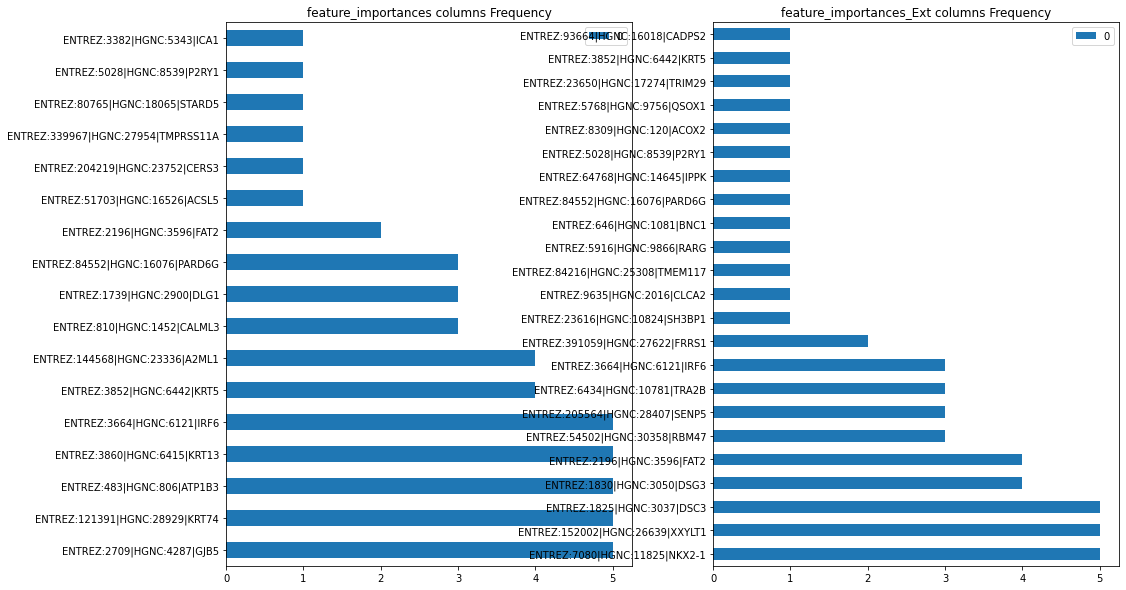

In [144]:
# feature importances
select_columns_plot(cols_fi, cols_fi_Ext, name1= "feature_importances" ,name2= "feature_importances_Ext")

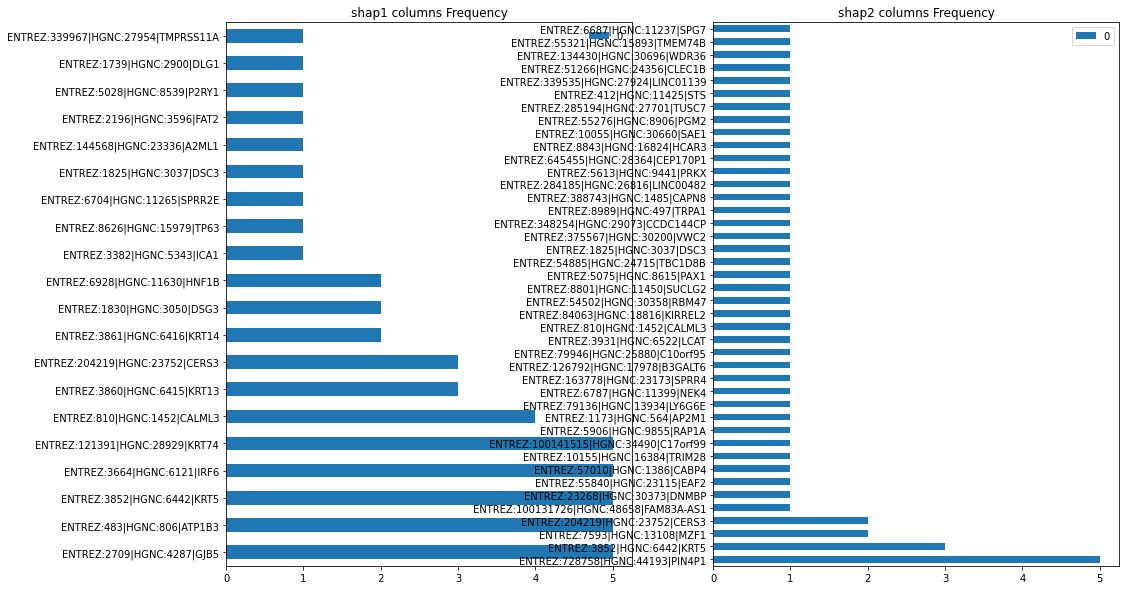

In [145]:
#shap 1,2
select_columns_plot(cols_sh1, cols_sh2, name1= "shap1" ,name2= "shap2")

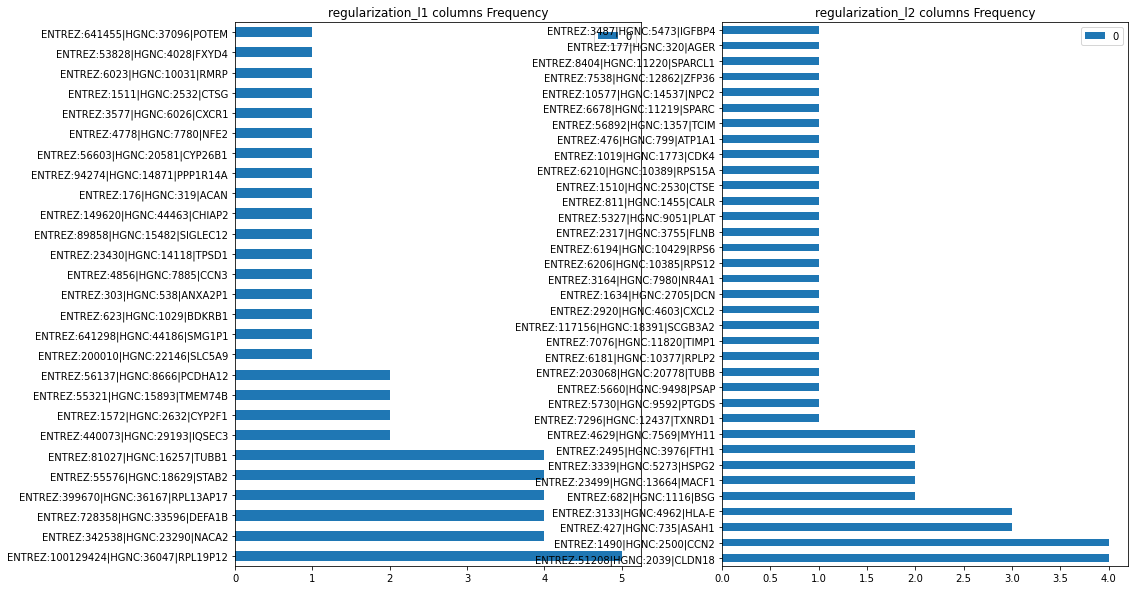

In [147]:
#regularization_l1,l2
select_columns_plot(cols_re_l1,cols_re_l2, name1= "regularization_l1" ,name2= "regularization_l2")

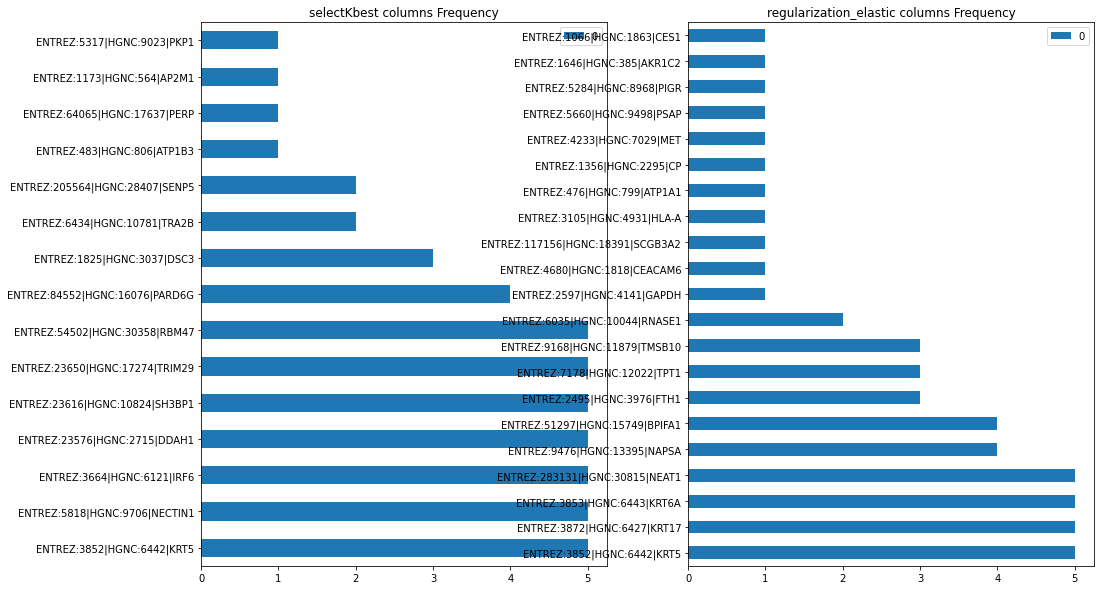

In [151]:
#selectKbest, regularization_elastic
select_columns_plot(cols_sk,cols_re_el, name1= "selectKbest" ,name2= "regularization_elastic")

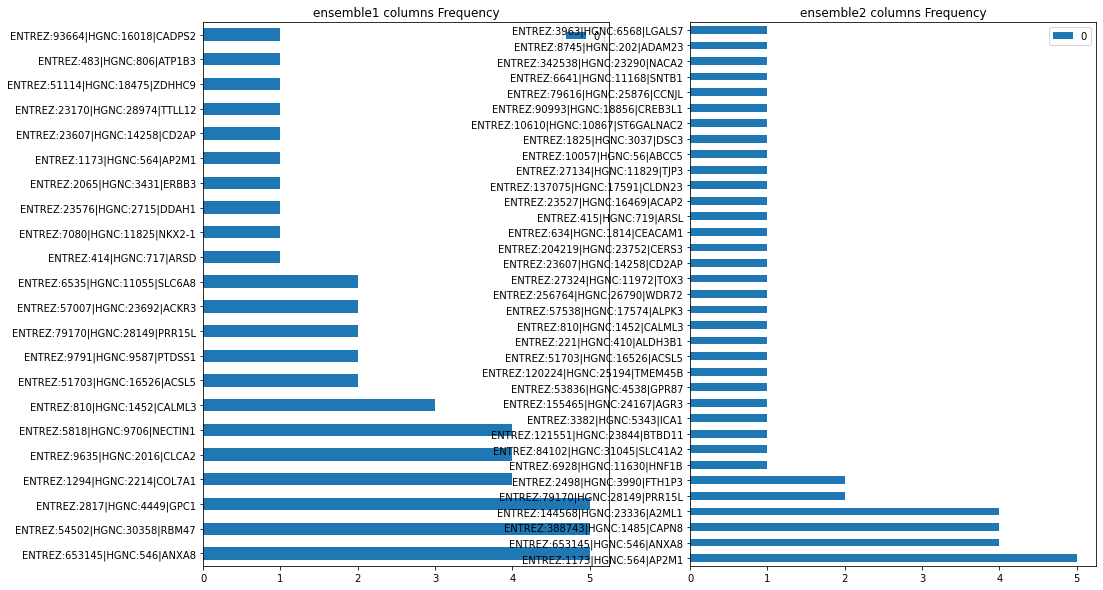

In [152]:
#ensemble1,2
select_columns_plot(cols_es1,cols_es2, name1= "ensemble1" ,name2= "ensemble2")